In [123]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split, KFold
import seaborn as sns  #data visualization library

In [174]:
# Read in the data stored in the file 'survey lung cancer.csv'
df = pd.read_csv('survey lung cancer.csv')
df.head(5)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Data analysis

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SMOKING'}>,
        <AxesSubplot:title={'center':'YELLOW_FINGERS'}>,
        <AxesSubplot:title={'center':'ANXIETY'}>],
       [<AxesSubplot:title={'center':'PEER_PRESSURE'}>,
        <AxesSubplot:title={'center':'CHRONIC DISEASE'}>,
        <AxesSubplot:title={'center':'FATIGUE'}>,
        <AxesSubplot:title={'center':'ALLERGY'}>],
       [<AxesSubplot:title={'center':'WHEEZING'}>,
        <AxesSubplot:title={'center':'ALCOHOL CONSUMING'}>,
        <AxesSubplot:title={'center':'COUGHING'}>,
        <AxesSubplot:title={'center':'SHORTNESS OF BREATH'}>],
       [<AxesSubplot:title={'center':'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot:title={'center':'CHEST PAIN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

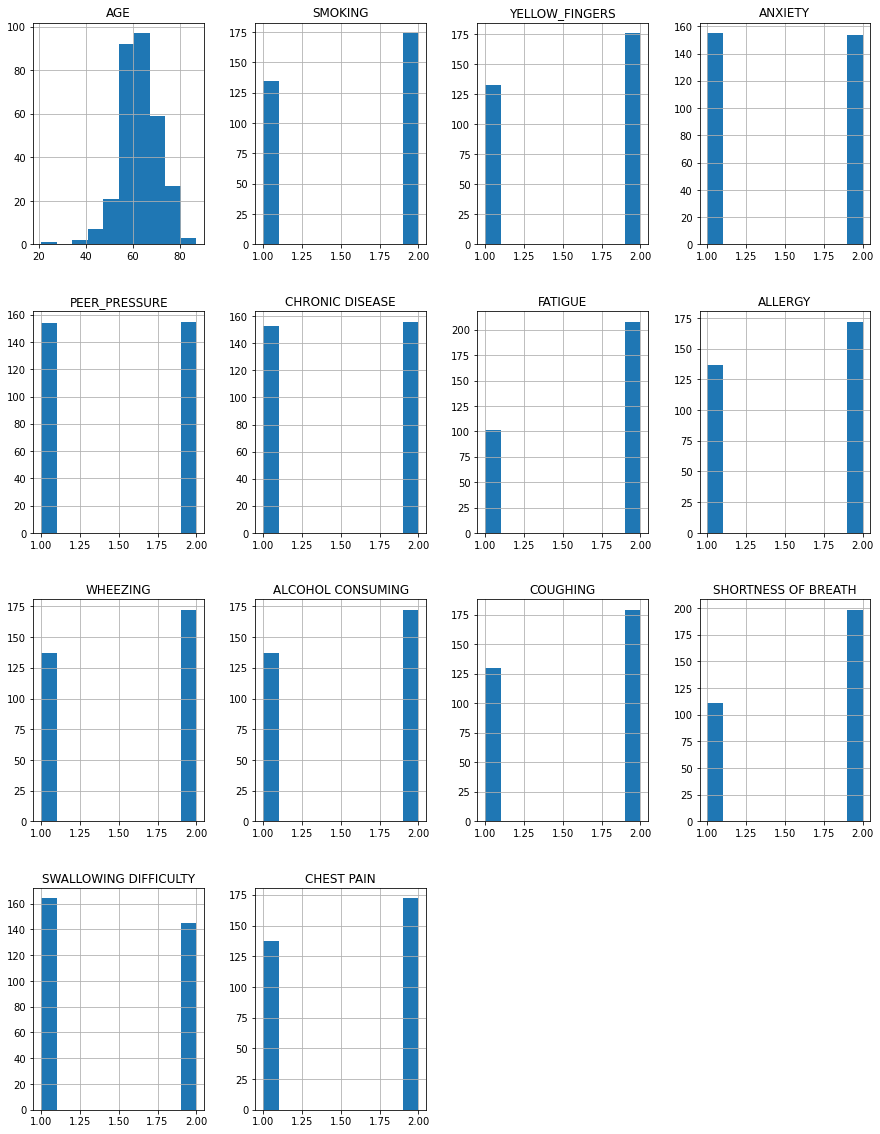

In [175]:
# Data histogram 
df.hist(figsize=(15,20))

In [178]:
# replace all M/F with 1/0
df.GENDER.replace(['M', 'F'], [1, 0], inplace=True)

# replace all YES/NO with 1/0
df.LUNG_CANCER.replace(['YES', 'NO'], [1, 0], inplace=True)

#df.info()
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns="LUNG_CANCER", axis=1)
y = df['LUNG_CANCER'].to_numpy().reshape(-1,)


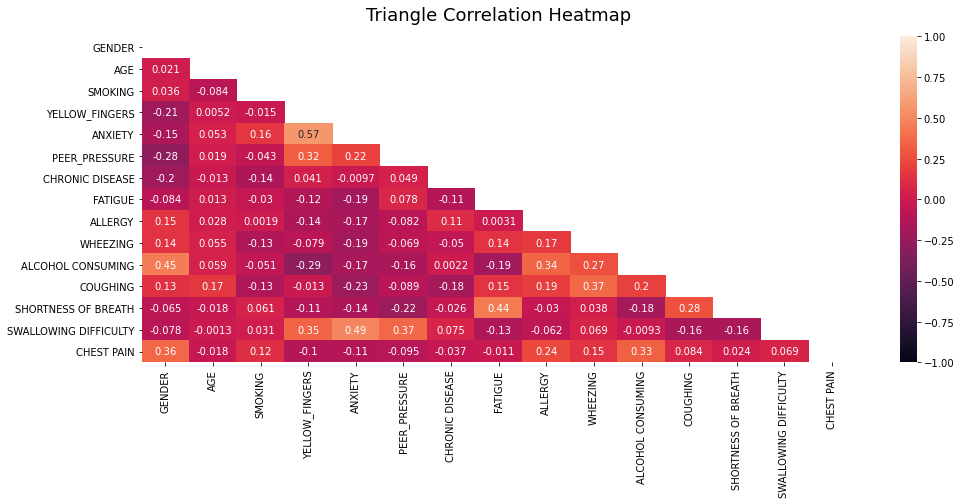

In [179]:
# Heatmap of dataframe

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(X.corr()))
htmap = sns.heatmap(X.corr(),vmin= -1, vmax= 1,  annot= True , mask = mask)


htmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e


#### High correlation 

In [180]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data.sort_values(by = ["VIF"]))


                  feature        VIF
0                  GENDER   3.147051
6         CHRONIC DISEASE  10.765420
2                 SMOKING  11.160631
8                 ALLERGY  13.129242
14             CHEST PAIN  13.922865
5           PEER_PRESSURE  13.975045
9                WHEEZING  14.307367
13  SWALLOWING DIFFICULTY  15.606034
11               COUGHING  17.472517
10      ALCOHOL CONSUMING  17.794841
12    SHORTNESS OF BREATH  18.783896
7                 FATIGUE  18.994946
3          YELLOW_FINGERS  19.077565
4                 ANXIETY  19.973701
1                     AGE  43.119904


In [181]:
# The maximum vif was droped after each interation 
# This was done manually until the vif
X = df[['GENDER', 'CHRONIC DISEASE', 'SMOKING']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data.sort_values(by = ["VIF"]))

           feature       VIF
0           GENDER  1.956725
1  CHRONIC DISEASE  4.873860
2          SMOKING  5.575048


# Data Splitting

In [182]:
kf = KFold(n_splits=5, shuffle=True, random_state=69)
#X = df[['GENDER', 'CHRONIC DISEASE', 'SMOKING']].to_numpy()
X = df.drop(columns="LUNG_CANCER").to_numpy()
y = df['LUNG_CANCER'].to_numpy().reshape(-1,)

#results for train error and 
# and validation set
train_res_acc = []
train_res_err = []
val_res_acc = []
val_res_err = []

for train_index, val_index in kf.split(X):
    X_train, X_val= X[train_index], X[val_index]
    y_train, y_val= y[train_index], y[val_index]

    # make logistic regression model
    linreg = LogisticRegression(max_iter=10000)
    linreg.fit(X_train, y_train)

    # training set
    y_pred_train = linreg.predict(X_train)
    
    
    train_acc = accuracy_score(y_train, y_pred_train)
    train_err = log_loss(y_train, y_pred_train)

    train_res_acc.append(train_acc)
    train_res_err.append(train_err)

    # validation set
    y_pred_val = linreg.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred_val)
    val_error = log_loss(y_val, y_pred_val)

    val_res_acc.append(val_acc)
    val_res_err.append(val_error)


# print result
print("Training accuracy: ", np.mean(train_res_acc))
print("Training error: ", np.mean(train_res_err))
print("Validation accuracy: ", np.mean(val_res_acc))
print("Validation error: ", np.mean(val_res_err))


Training accuracy:  0.9368943450437508
Training error:  2.179627689283686
Validation accuracy:  0.9094658910629297
Validation error:  3.126991637820596
